# 机器学习实验报告
## Lab5：Hierarchical Clustering
- 姓名：周钰宸
- 学号：2111408
- 专业：信息安全

## 1 实验要求
数据集：⽣成2000个样例，每个样例的前 3 列表示特征，第 4 列表示标签（本次直接使用给定数据即可）
### 1.1基本要求(4’)：绘制聚类前后样本分布情况
(1) 实现 single-linkage 层次聚类算法；
(2) 实现 complete-linkage 层次聚类算法。
### 1.2中级要求(1’)：实现 average-linkage 层次聚类算法，绘制样本分布图。
### 1.3提⾼要求(1’)：对⽐上述三种算法，给出结论。
### 1.4拓展要求：通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

## 2 实验原理
### 2.1层次聚类
这是关于层次聚类算法的一些信息：

1. **单链层次聚类算法（Single-linkage Clustering）**：这种算法在每一步中合并两个最近的成员（即两个距离最近的集群）。这种方法倾向于产生长而瘦的集群，其中同一集群的相邻元素之间的距离很小，但集群两端的元素之间的距离可能比其他两个集群的元素之间的距离要大。

2. **完全链层次聚类算法（Complete-linkage Clustering）**：这种算法在每一步中合并两个直径最小的集群（或者说两个最大成对距离最小的集群）。这种方法倾向于产生紧凑的、球形的集群。

3. **平均链层次聚类算法（Average-linkage Clustering）**：这种算法在每一步中合并两个平均距离最小的集群。这种方法是对完全链聚类对离群值的敏感性和单链聚类形成长链的倾向之间的一种折衷。

后面实验中会分别使用上述三种方法，并**对结果进行分析和比较。**


## 3 基本要求(4’)：绘制聚类前后样本分布情况
(1) 实现 single-linkage 层次聚类算法；
(2) 实现 complete-linkage 层次聚类算法。

### 3.1 导入所需要的包

In [11]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
"""
@Project ：Machine Learning 
@File    ：main.py
@IDE     ：PyCharm 
@Author  ：ErwinZhou
@Date    ：2023/11/22 19:09 
"""
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from tqdm import trange
# ---初级要求---
# ---中级要求---
# ---高级要求---
# ---拓展要求---

### 3.2 数据预分析
先对数据进行提取，可以看到特征矩阵的大小为2000×3，标签也是2000×1，代表着**我们一共有2000个样本，每个样本具有三个特征。**

In [5]:
filepath1 = "data.dat"
filepath2 = "label.dat"
X = pd.read_csv(filepath1, header=None, sep=" ") # for there is no header in the data
Y = pd.read_csv(filepath2, header=None)
print("------------------------X------------------------")
print(X)
print("Dimension:{0}".format(X.shape))
print("------------------------Y------------------------")
print(Y)
print("Dimension:{0}".format(Y.shape))

------------------------X------------------------
             0         1         2
0     2.080957  5.841362  4.929697
1     0.296014  3.175925  4.145915
2     2.164914  6.197920  7.737439
3     1.457204  1.224453  0.702150
4     2.061224  4.739729  7.969272
...        ...       ...       ...
1995  2.839672  6.247741  4.668259
1996  2.751517  5.154804  5.689927
1997  2.190572  6.136170  6.770182
1998  1.123277  3.106084  2.598650
1999  0.261586  0.697779  0.469163

[2000 rows x 3 columns]
Dimension:(2000, 3)
------------------------Y------------------------
        0
0     2.0
1     1.0
2     3.0
3     0.0
4     3.0
...   ...
1995  2.0
1996  2.0
1997  3.0
1998  1.0
1999  0.0

[2000 rows x 1 columns]
Dimension:(2000, 1)


### 3.3 绘制聚类前样本分布情况
1. 对于特征数据集X，由于其三维的特征，采用**三维散点图绘制它的聚类前分布情况**，可以看到：
    * **分布情况**：可以看到此时集群已经分布得很好。能够辨认出是四个集群。但是还是有一些点混杂在其他集群中，这些点可能是离群点，也可能是噪声点。
    * **集群特征**：还观察到此时的四个集群呈现分布较为规则的结构。又因为单链聚类算法倾向于生成细而长的集群，因此可以<font size=3, color="red">初步猜测后续过程中如果继续使用单链聚类算法可能会导致性能不佳，使得集群的长链倾向性加强，分布不够集中。推测使用全链聚类算法或者平均链接聚类算法可能会有更好的效果。</font>
2. 对于标签数据Y，我们通过绘制其分布的柱状图观察到此时的标签分布情况，可以看到此时的标签分布情况是比较均匀的，每个标签的数量都在500左右，说明此时的标签分布是比较均匀的。**后面可以对比进一步观察。**

------------------------X------------------------


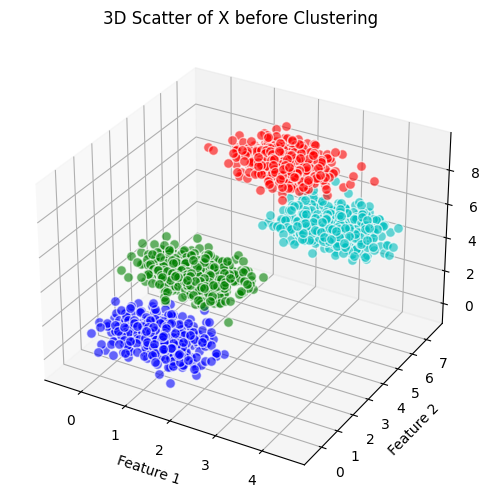

------------------------Y------------------------


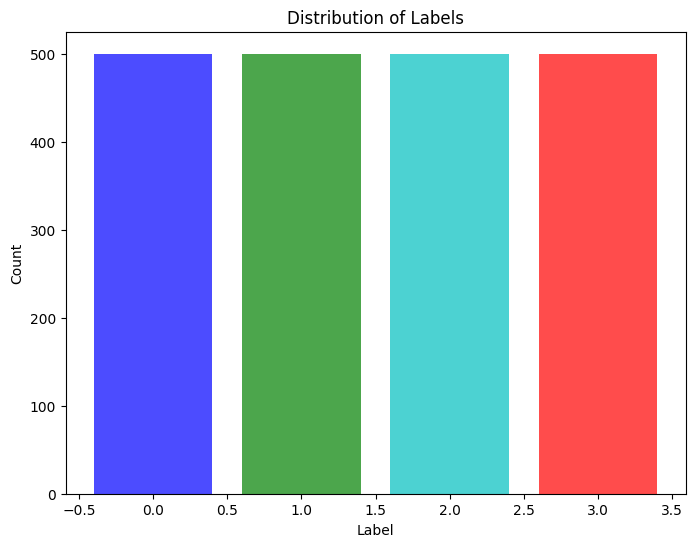

In [9]:
X = np.array(X)
Y = np.array(Y)
labels = Y.reshape(-1)
labels = labels.astype(int)

print("------------------------X------------------------")
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors='bgcrmky' # Each cluster is marked with different colors

for i in range(len(labels)):
    label = labels[i]
    scatter = ax.scatter(X[i][0], X[i][1], X[i][2],
                        color = colors[label%len(colors)],
                        s=50,
                        alpha=0.6,
                        edgecolors='w')  

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.set_title('3D Scatter of X before Clustering')
ax.grid(True)
plt.show()

print("------------------------Y------------------------")
unique_labels = np.unique(labels)
counts = [np.sum(labels == label) for label in unique_labels]
plt.figure(figsize=(8, 6))
for i in range(len(unique_labels)):
    plt.bar(unique_labels[i], counts[i], color=colors[i % len(colors)], alpha=0.7)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### 3.4 定义层次聚类模型

#### 3.4.1 计算样本间的距离矩阵
由于本次实验，每次进行聚类的过程中，都需要对样本之间的距离进行计算。**而实际上只有第一次通过样本点计算的距离是要耗费最大计算量的**，后面都可以通过合并的具体两个簇来简化。因此需要将**第一次计算的距离矩阵保存下来，后面的计算直接调用即可。**

In [13]:
def Get_distance_matrix(X, Type, Is_dump, filename):
    """
    @description: Calculate the distance matrix of given samples X
    @param X: prerequisite needs to calculate the distances matrix
    @param Type: determining argument of which type of norm will be used
                 by default, Type=2 is used, which corresponds to the Euclidean distance.
    @param Is_dump: determining argument of the need to dump the file for later use
    @param filename: the name of the file to be dumped
    @return: distances matrix

    """
    if os.path.isfile(f"D:\\Codes\\Machine Learning\\Lab05\\dis\\{filename}_{Type}.dis"):  # To see if the file has
        # already existed
        return pickle.load(open(f"D:\\Codes\\Machine Learning\\Lab05\\dis\\{filename}_{Type}.dis", 'rb'))  # if did,
        # then load it

    n = X.shape[0]

    distances = np.zeros((n, n), dtype=np.float64)  # initialize the distances matrix

    for i in range(n):
        for j in range(i + 1, n):
            distances[j, i] = distances[i, j] = np.sqrt(np.sum(np.power(X.iloc[i, :] - X.iloc[j, :], Type)))

    if Is_dump:  # dump the file to current folder
        with open(f"D:\\Codes\\Machine Learning\\Lab05\\dis\\{filename}_{Type}.dis", 'wb') as f:
            pickle.dump(distances, f)
        print("Dump!")
    return distances

dis = Get_distance_matrix(X, 2, True, "origin")
print(dis)
print(dis.shape)

[[0.         3.30225567 2.83153604 ... 1.86716621 3.71923108 7.04719216]
 [3.30225567 0.         5.05215669 ... 4.38624868 1.75592459 4.43406048]
 [2.83153604 5.05215669 0.         ... 0.96956613 6.08700361 9.31139283]
 ...
 [1.86716621 4.38624868 0.96956613 ... 0.         5.26518922 8.54399852]
 [3.71923108 1.75592459 6.08700361 ... 5.26518922 0.         3.32823603]
 [7.04719216 4.43406048 9.31139283 ... 8.54399852 3.32823603 0.        ]]
(2000, 2000)


#### 3.4.2 实现单链层次聚类算法
由于我们考虑到实现单链聚类算法时候，实际上只需要考虑每次合并的两个簇之间的距离，因此我们可以**通过每次只计算需要合并的距离矩阵的对应部分，来减少计算量。** 未来只需要在迭代过程中将返回的结果合并到原来矩阵中，并删除其中合并的两个部分其中之一即可。

In [15]:
def single_linkage(merged_clusters):
    """
    @description: calculate the distance between two clusters using single linkage method
    @param merged_clusters: clusters to be merged
    @return: result of the distance between two clusters
    """
    res = []
    for i in range(len(merged_clusters[0])):
        res.append(min(merged_clusters[0][i], merged_clusters[1][i]))
    return res

#### 3.4.3 定义层次聚类模型
在定义了相关的实现算法后，我们需要将其用到层次聚类模型中。这里依次定义了以下几个函数：
1. **init**：初始化层次聚类模型，包括初始化参数，通过传入的**参数method决定使用的聚类算法**（暂时只实现了一个单链聚类，有待进一步拓展），以及初始化聚类的类别数目，以及**聚类的历史记录（实际上保存的是一个有向无环图，方便转换为树进行预测）**。
2. **fit**：模型训练函数。通过传入的数据集X，进行训练。其中有几个值得注意：
    * `cluster_distances[i][i] = np.inf`：将对角线元素设置为无穷大，避免被选为距离最小的两个簇。
    * `cluster_distances[c1] = merged_clusters`：将合并后的簇的距离更新到距离矩阵中。其中merged_clusters是一个长度为2的列表，是单链聚类算法中合并后的两个簇的距离。
3. **predict**: 通过传入的聚类数目，返回最终的聚类结果。**为了方便计算，采用了树状的数据结构思想。通过查找每个元素的“根”节点，我们可以确定哪些元素属于同一个聚类。** 其中也有几个值得注意：
    * `roots = list(range(self.sample_size))`：初始化一个列表，列表的索引代表每个数据点，列表的值代表每个数据点的“根”节点。
    * `find_root`: 定义一个辅助函数，用于找到给定元素的“根”节点。如果元素的“根”节点就是它自己，那么它就是一个簇的代表元素。
    * `roots[find_root(destination)] = find_root(source)`：将目标簇的所有元素的“根”节点更新为源簇的代表元素。
    * `roots[node] = find_root(roots[node])`：更新每个元素的“根”节点。
    * `labels[i] = labels[find_root(i)]`：将非代表元素的标签更新为其代表元素的标签。
   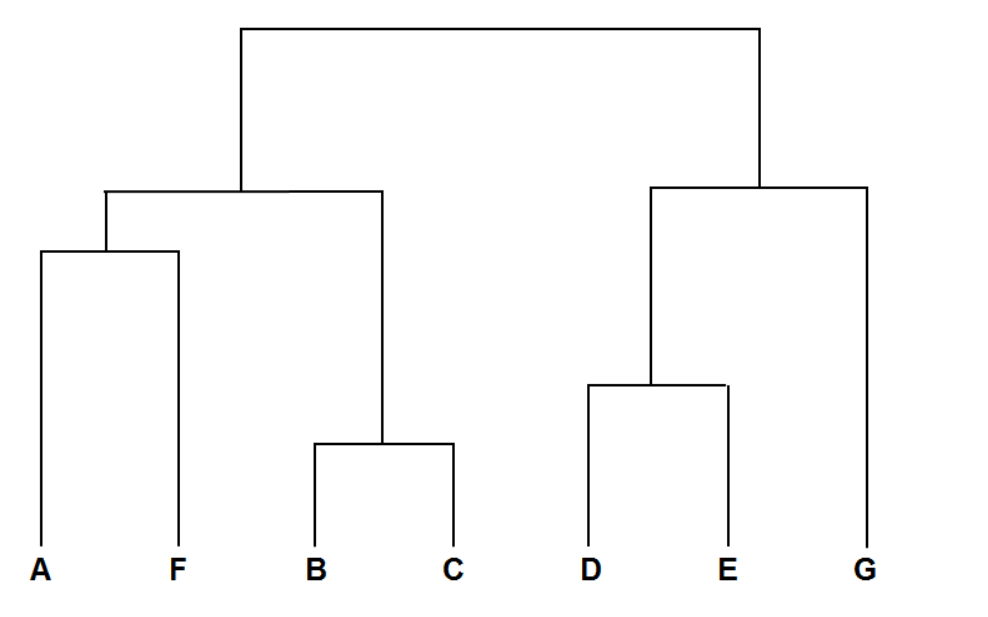

In [17]:
class HierarchicalClustering:
    """
    Hierarchical Clustering:
    Class including fit, predict, calculate_accurate_rate
    Based on three different methods: singleLinkage, completeLinkage, averageLinkage
    """

    def __init__(
            self,
            method
    ):
        """
        @description:initiate the class
        @param method: string parameter, determining which method to use
        """
        self.method = method # method used in the model
        self.sample_size = None
        self.cluster_history = [] # Get the history of the clustering and a disconnceted graph for later prediction
        self.classes = [] # clustering classes of the samples

    def single_linkage(self, merged_clusters):
        """
        @description: calculate the distance between two clusters using single linkage method
        @param merged_clusters: clusters to be merged
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(min(merged_clusters[0][i], merged_clusters[1][i]))
        return res


    def fit(self, X):
        """
        @description: fit the model using different method
        @param X: given samples
        @return:
        """
        self.sample_size = X.shape[0]
        sample_distances = Get_distance_matrix(X, 2, True, "origin")
        self.classes, cluster_size = [[i] for i in range(self.sample_size)], self.sample_size
        # Initialize the cluster_distances, which in the beginning is the sample_distances
        cluster_distances = sample_distances
        # Set the diagonal elements to be infinite, avoiding the situation that the same cluster is merged
        for i in range(cluster_size):
            cluster_distances[i][i] = np.inf

        # Merge the clusters until there is only one cluster left
        while cluster_size != 1:
            # Find the most similar two clusters
            res = np.argmin(cluster_distances)
            c1, c2 = int(res / cluster_size), res % cluster_size
            # c2 -> c1, and restore the history
            self.cluster_history.append((self.classes[c1][0], self.classes[c2][0]))
            # Update cluster_distances
            merged_clusters = self.single_linkage(cluster_distances[[c1, c2]])
            # merged clusters are only two classes, so we need to delete the second one
            cluster_distances[c1] = merged_clusters
            cluster_distances[:, c1] = merged_clusters
            cluster_distances = np.delete(cluster_distances, c2, axis=0)
            cluster_distances = np.delete(cluster_distances, c2, axis=1)
            cluster_distances[c1][c1] = np.inf
            # Update classes
            self.classes[c1] = self.classes[c1] + self.classes[c2]
            del self.classes[c2]
            cluster_size -= 1

    def predict(self, num_clusters):
        """
        @description: Generate the labels of the samples using tree structure
        @param num_clusters: The number of clusters which is our aim, it can be changed for optimization
        @return: The final cluster labels
        """
        # Initialize a list, the index of the list represents each data point,
        # the value of the list represents the "root" node of each data point
        roots = list(range(self.sample_size))

        # Define a helper function to find the "root" node of a given element
        def find_root(node):
            # If the "root" node of the element is itself, then it is a representative element of a cluster
            if roots[roots[node]] == roots[node]:
                return roots[node]
            # Otherwise, recursively find the "root" of the "root" of the element
            roots[node] = find_root(roots[node])
            return roots[node]

        # Update the "root" node of each element according to the previous merge steps
        for i in range(self.sample_size - num_clusters):  # According to the steps record
            source, destination = self.cluster_history[i]
            # Update the "root" node of all elements of the destination cluster to the representative element of the source cluster
            roots[find_root(destination)] = find_root(source)

        # Initialize cluster labels and cluster count
        labels, num_labels = [0 for i in range(self.sample_size)], 0

        # Assign a new label to each cluster
        for i in range(self.sample_size):  # Mark the root node as a new cluster
            if i == roots[i]:  # i is the root
                num_labels += 1
                labels[i] = num_labels

        # Update the label of non-representative elements to the label of their representative elements
        for i in range(self.sample_size):  # Mark non-root nodes as the cluster of the root node
            if i != roots[i]:  # i is not the root
                labels[i] = labels[find_root(i)]

        # Return the final cluster labels
        return labels

### 3.5 计算错误率评估性能
这里考虑到由于生成的聚类结果是最初始的2000个类别的高度抽象和概况，应该对应着数据集最开始的分布情况即真实的标签。

但由于我们没有给聚类结果显式地标注标签，只是单纯地将其分为了不同的类别，因此我们需要通过一些方法来对聚类结果进行标注，然后再计算准确率。也就是说我们现在假如分为了4个类别，**实际上结果是对的，但是我们给他们起的”名字“也就是标签是不一样的，会导致一些错误性能估计。**

为此我们通过先计算**所有预测结果的组合即全排列，然后将全排列中某个情况（起某种给聚类结果其名字的方式）带来的最低错误率作为最终性能评估的指标。**这样做的好处是**可以避免由于聚类结果的标签不同而导致的性能评估不准确的问题。**

In [20]:
def generate_permutations(input_list):
    """
    @description:Generate all permutations of a list
    @param input_list: The list for which to generate permutations
    @return: A list of all permutations of the input list
    """
    # If the list only contains one element, return the list itself
    if len(input_list) == 1:
        return [input_list]

    result = []
    for i in range(len(input_list)):
        # Generate a sublist by removing the current element
        sub_list = input_list[:i] + input_list[i + 1:]
        # Recursively generate all permutations of the sublist
        sub_permutations = generate_permutations(sub_list)
        # prefixed with the current element
        result += [input_list[i:i + 1] + permutation for permutation in sub_permutations]

    return result


def calculate_error_rate(labels, predicted_labels, num_clusters):
    """
    @todo calculate error rates
    @param labels: true labels
    @param predicted_labels: results from classify_data
    @param num_clusters: number of clusters
    @return: error rates
    """
    min_error_rate = 1  
    permutations = generate_permutations([i for i in range(num_clusters)])
    for names in permutations:
        error_rate = sum(labels[i] != names[predicted_labels[i] - 1] 
                         for i in range(len(predicted_labels))) / len(predicted_labels)
        min_error_rate = min(min_error_rate, error_rate)  # Update...
    return min_error_rate 


### 3.6 封装绘制3D散点图函数
最后我们只需要将之前使用的绘制散点图的函数拿过来封装起来，就差不多大功告成啦。

In [21]:
def plot_clusters(X, labels, predicted_labels, method):
    """
    @description: plot clusters in 3D
    @param X: given samples
    @param labels: real labels of the samples
    @param predicted_labels: predicted labels of the samples by the model
    @param method: method used in the model to plot the title
    @return:
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    colors = 'bgcrmky'  # Each cluster is marked with different colors

    for i in range(len(labels)):
        predict_label = predicted_labels[i]
        scatter = ax.scatter(X[i][0], X[i][1], X[i][2],
                             color=colors[predict_label % len(colors)],
                             s=50,
                             alpha=0.6,
                             edgecolors='w')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    ax.set_title('3D Scatter of X after Clustering:' + method)
    ax.grid(True)
    plt.show()


### 3.7 测试模型性能
最后我们只需要依次调用我们之前封装的接口，最后输出一个错误率和正确率，并且**绘制对应的聚类后的散点图即可。注意由于最开始数据集是4个类别，因此我们这里也初步设定聚类簇的个数是4，在拓展要求中会探索。**

-------Single Linkage-------
Error Rate of Single Linkage Clustering: 49.95%
Accuracy of Single Linkage Clustering: 50.05%


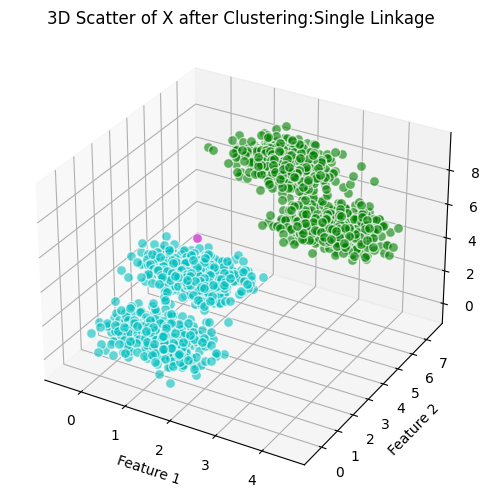

In [24]:
print("-------Single Linkage-------")
model = HierarchicalClustering(method="singleLinkage")
model.fit(X)
predicted_labels = model.predict(4)
error_rate = calculate_error_rate(labels, predicted_labels, 4)
accuracy = 1 - error_rate
print(f"Error Rate of Single Linkage Clustering: {error_rate*100:.2f}%")
print(f"Accuracy of Single Linkage Clustering: {accuracy*100:.2f}%")
plot_clusters(X, labels, predicted_labels, "Single Linkage")

### 3.7 模型评价
可以看到使用单链聚类的结果具有如下的特征：
1. **准确率**：可以看到此时使用**单链聚类模型的准确率只有百分之50左右**，这是因为**单链聚类算法倾向于生成细长的集群，而此时的数据集中的样本分布却不是细长的，而是偏规则的！** 这一点我们在数据分析时候就发现了。因此单链聚类算法的性能不佳，正如我们预测的那样。
2. **分布情况**：同样地在下图中可以看到，**单链聚类算法生成的集群也是细长的，而且分布不够集中。目的让它聚类为4个簇，它却只分成了两个。** 这也是导致准确率不高的原因。

### 3.8 实现完全链层次聚类算法
和之前的思路类似，我们只需要将之前的单链聚类算法中的合并函数改为完全链聚类算法中的合并函数即可。即每次聚类选择最大的距离进行合并。编写函数如下：

In [26]:
def complete_linkage(self, merged_clusters):
    """
    @description: calculate the distance between two clusters using complete linkage method
    @param merged_clusters: clusters to be merged
    @return: result of the distance between two clusters
    """
    res = []
    for i in range(len(merged_clusters[0])):
        res.append(max(merged_clusters[0][i], merged_clusters[1][i]))
    return res

将这个函数合并到之前的class中，然后依次调用即可。**然后我们来测试下使用完全链层次聚类算法的性能，绘制聚类后的散点图，并给出模型评价。**

In [27]:
class HierarchicalClustering:
    """
    Hierarchical Clustering:
    Class including fit, predict, calculate_accurate_rate
    Based on three different methods: singleLinkage, completeLinkage, averageLinkage
    """

    def __init__(
            self,
            method
    ):
        """
        @description:initiate the class
        @param method: string parameter, determining which method to use
        """
        self.method = method # method used in the model
        self.sample_size = None
        self.cluster_history = [] # Get the history of the clustering and a disconnceted graph for later prediction
        self.classes = [] # clustering classes of the samples

    def single_linkage(self, merged_clusters):
        """
        @description: calculate the distance between two clusters using single linkage method
        @param merged_clusters: clusters to be merged
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(min(merged_clusters[0][i], merged_clusters[1][i]))
        return res

    def complete_linkage(self, merged_clusters):
        """
        @description: calculate the distance between two clusters using complete linkage method
        @param merged_clusters: clusters to be merged
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(max(merged_clusters[0][i], merged_clusters[1][i]))
        return res
    
    def fit(self, X):
        """
        @description: fit the model using different method
        @param X: given samples
        @return:
        """
        self.sample_size = X.shape[0]
        sample_distances = Get_distance_matrix(X, 2, True, "origin")
        self.classes, cluster_size = [[i] for i in range(self.sample_size)], self.sample_size
        # Initialize the cluster_distances, which in the beginning is the sample_distances
        cluster_distances = sample_distances
        # Set the diagonal elements to be infinite, avoiding the situation that the same cluster is merged
        for i in range(cluster_size):
            cluster_distances[i][i] = np.inf

        # Merge the clusters until there is only one cluster left
        while cluster_size != 1:
            # Find the most similar two clusters
            res = np.argmin(cluster_distances)
            c1, c2 = int(res / cluster_size), res % cluster_size
            # c2 -> c1, and restore the history
            self.cluster_history.append((self.classes[c1][0], self.classes[c2][0]))
            # Update cluster_distances
            merged_clusters = []
            # Update cluster_distances
            if self.method == "singleLinkage":
                merged_clusters = self.single_linkage(cluster_distances[[c1, c2]])
            elif self.method == "completeLinkage":
                merged_clusters = self.complete_linkage(cluster_distances[[c1, c2]])
                
            
            # merged clusters are only two classes, so we need to delete the second one
            cluster_distances[c1] = merged_clusters
            cluster_distances[:, c1] = merged_clusters
            cluster_distances = np.delete(cluster_distances, c2, axis=0)
            cluster_distances = np.delete(cluster_distances, c2, axis=1)
            cluster_distances[c1][c1] = np.inf
            # Update classes
            self.classes[c1] = self.classes[c1] + self.classes[c2]
            del self.classes[c2]
            cluster_size -= 1

    def predict(self, num_clusters):
        """
        @description: Generate the labels of the samples using tree structure
        @param num_clusters: The number of clusters which is our aim, it can be changed for optimization
        @return: The final cluster labels
        """
        # Initialize a list, the index of the list represents each data point,
        # the value of the list represents the "root" node of each data point
        roots = list(range(self.sample_size))

        # Define a helper function to find the "root" node of a given element
        def find_root(node):
            # If the "root" node of the element is itself, then it is a representative element of a cluster
            if roots[roots[node]] == roots[node]:
                return roots[node]
            # Otherwise, recursively find the "root" of the "root" of the element
            roots[node] = find_root(roots[node])
            return roots[node]

        # Update the "root" node of each element according to the previous merge steps
        for i in range(self.sample_size - num_clusters):  # According to the steps record
            source, destination = self.cluster_history[i]
            # Update the "root" node of all elements of the destination cluster to the representative element of the source cluster
            roots[find_root(destination)] = find_root(source)

        # Initialize cluster labels and cluster count
        labels, num_labels = [0 for i in range(self.sample_size)], 0

        # Assign a new label to each cluster
        for i in range(self.sample_size):  # Mark the root node as a new cluster
            if i == roots[i]:  # i is the root
                num_labels += 1
                labels[i] = num_labels

        # Update the label of non-representative elements to the label of their representative elements
        for i in range(self.sample_size):  # Mark non-root nodes as the cluster of the root node
            if i != roots[i]:  # i is not the root
                labels[i] = labels[find_root(i)]

        # Return the final cluster labels
        return labels

-------Complete Linkage-------
Error Rate of Complete Linkage Clustering: 0.55%
Accuracy of Complete Linkage Clustering: 99.45%


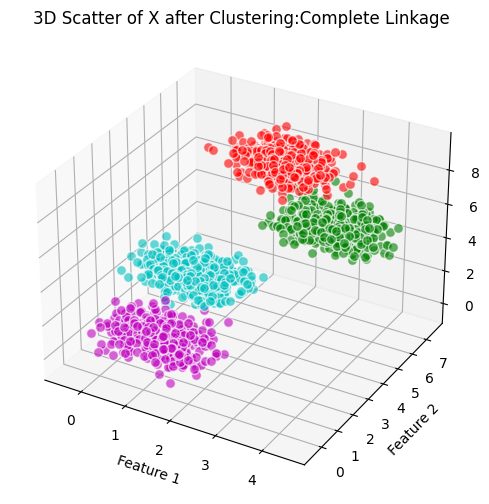

In [32]:
print("-------Complete Linkage-------")
model = HierarchicalClustering(method="completeLinkage")
model.fit(X)
predicted_labels = model.predict(4)
error_rate = calculate_error_rate(labels, predicted_labels, 4)
accuracy = 1 - error_rate
print(f"Error Rate of Complete Linkage Clustering: {error_rate*100:.2f}%")
print(f"Accuracy of Complete Linkage Clustering: {accuracy*100:.2f}%")
plot_clusters(X, labels, predicted_labels, "Complete Linkage")

### 3.9 模型评价
可以看到使用完全链聚类的结果具有如下的特征：
1. **准确率**：可以看到此时使用**完全链聚类模型的准确率达到了99.45%，准确率极高，实现非常成功**。
2. **分布情况**：同样地在下图中可以看到，此时**模型将所有样本点分到的类簇结果也和聚类前的真实情况十分接近，同样出现了四类。进一步验证了模型性能的优异。**

## 4 中级要求(1’)：实现 average-linkage 层次聚类算法，绘制样本分布图。

### 4.1 实现平均层次聚类算法
这里处理起来就很简单了，只需要多设计一个函数加入到我们的模型中就可以。唯一注意的点就是此时因为是平均层次聚类算法，需要涉及到两个类簇具体的个数，因为多出来两个参数。**核心思想还是一样，直接合并两个将要合并的类簇，只需要距离矩阵的一部分。**

In [30]:
def average_linkage(self, merged_clusters, n_p, n_q):
    """
    @description: calculate the distance between two clusters using average linkage method
    @param merged_clusters: clusters to be merged
    @param n_p: number of elements in cluster p
    @param n_q: number of elements in cluster q
    @return: result of the distance between two clusters
    """
    res = []
    for i in range(len(merged_clusters[0])):
        res.append(
            (merged_clusters[0][i] * n_p + merged_clusters[1][i] * n_q)
            /
            (n_p + n_q)
        )
    return res

In [31]:
class HierarchicalClustering:
    """
    Hierarchical Clustering:
    Class including fit, predict, calculate_accurate_rate
    Based on three different methods: singleLinkage, completeLinkage, averageLinkage
    """

    def __init__(
            self,
            method
    ):
        """
        @description:initiate the class
        @param method: string parameter, determining which method to use
        """
        self.method = method # method used in the model
        self.sample_size = None
        self.cluster_history = [] # Get the history of the clustering and a disconnceted graph for later prediction
        self.classes = [] # clustering classes of the samples

    def single_linkage(self, merged_clusters):
        """
        @description: calculate the distance between two clusters using single linkage method
        @param merged_clusters: clusters to be merged
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(min(merged_clusters[0][i], merged_clusters[1][i]))
        return res

    def complete_linkage(self, merged_clusters):
        """
        @description: calculate the distance between two clusters using complete linkage method
        @param merged_clusters: clusters to be merged
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(max(merged_clusters[0][i], merged_clusters[1][i]))
        return res

    def average_linkage(self, merged_clusters, n_p, n_q):
        """
        @description: calculate the distance between two clusters using average linkage method
        @param merged_clusters: clusters to be merged
        @param n_p: number of elements in cluster p
        @param n_q: number of elements in cluster q
        @return: result of the distance between two clusters
        """
        res = []
        for i in range(len(merged_clusters[0])):
            res.append(
                (merged_clusters[0][i] * n_p + merged_clusters[1][i] * n_q)
                /
                (n_p + n_q)
            )
        return res

    def fit(self, X):
        """
        @description: fit the model using different method
        @param X: given samples
        @return:
        """
        self.sample_size = X.shape[0]
        sample_distances = Get_distance_matrix(X, 2, True, "origin")
        self.classes, cluster_size = [[i] for i in range(self.sample_size)], self.sample_size
        # Initialize the cluster_distances, which in the beginning is the sample_distances
        cluster_distances = sample_distances
        # Set the diagonal elements to be infinite, avoiding the situation that the same cluster is merged
        for i in range(cluster_size):
            cluster_distances[i][i] = np.inf

        # Merge the clusters until there is only one cluster left
        while cluster_size != 1:
            # Find the most similar two clusters
            res = np.argmin(cluster_distances)
            c1, c2 = int(res / cluster_size), res % cluster_size
            # c2 -> c1, and restore the history
            self.cluster_history.append((self.classes[c1][0], self.classes[c2][0]))
            merged_clusters = []
            # Update cluster_distances
            if self.method == "singleLinkage":
                merged_clusters = self.single_linkage(cluster_distances[[c1, c2]])
            elif self.method == "completeLinkage":
                merged_clusters = self.complete_linkage(cluster_distances[[c1, c2]])
            elif self.method == "averageLinkage":
                merged_clusters = self.average_linkage(cluster_distances[[c1, c2]], len(self.classes[c1]),
                                                       len(self.classes[c2]))
            else:
                raise ValueError("The method is not supported!")
            # merged clusters are only two classes, so we need to delete the second one
            cluster_distances[c1] = merged_clusters
            cluster_distances[:, c1] = merged_clusters
            cluster_distances = np.delete(cluster_distances, c2, axis=0)
            cluster_distances = np.delete(cluster_distances, c2, axis=1)
            cluster_distances[c1][c1] = np.inf
            # Update classes
            self.classes[c1] = self.classes[c1] + self.classes[c2]
            del self.classes[c2]
            cluster_size -= 1

    def predict(self, num_clusters):
        """
        @description: Generate the labels of the samples using tree structure
        @param num_clusters: The number of clusters which is our aim, it can be changed for optimization
        @return: The final cluster labels
        """
        # Initialize a list, the index of the list represents each data point,
        # the value of the list represents the "root" node of each data point
        roots = list(range(self.sample_size))

        # Define a helper function to find the "root" node of a given element
        def find_root(node):
            # If the "root" node of the element is itself, then it is a representative element of a cluster
            if roots[roots[node]] == roots[node]:
                return roots[node]
            # Otherwise, recursively find the "root" of the "root" of the element
            roots[node] = find_root(roots[node])
            return roots[node]

        # Update the "root" node of each element according to the previous merge steps
        for i in range(self.sample_size - num_clusters):  # According to the steps record
            source, destination = self.cluster_history[i]
            # Update the "root" node of all elements of the destination cluster to the representative element of the source cluster
            roots[find_root(destination)] = find_root(source)

        # Initialize cluster labels and cluster count
        labels, num_labels = [0 for i in range(self.sample_size)], 0

        # Assign a new label to each cluster
        for i in range(self.sample_size):  # Mark the root node as a new cluster
            if i == roots[i]:  # i is the root
                num_labels += 1
                labels[i] = num_labels

        # Update the label of non-representative elements to the label of their representative elements
        for i in range(self.sample_size):  # Mark non-root nodes as the cluster of the root node
            if i != roots[i]:  # i is not the root
                labels[i] = labels[find_root(i)]

        # Return the final cluster labels
        return labels


### 4.2 模型测试及性能评价

-------Average Linkage-------
Error Rate of Average Linkage Clustering: 0.20%
Accuracy of Average Linkage Clustering: 99.80%


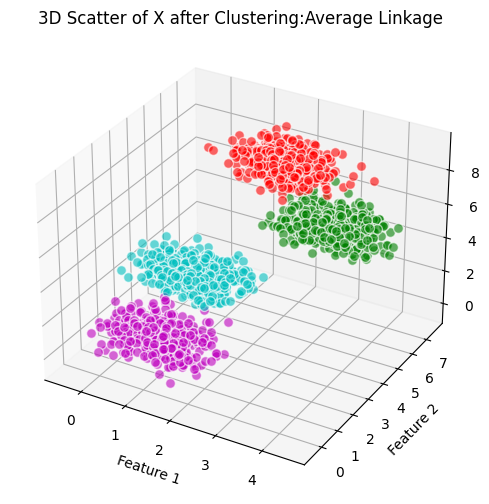

In [33]:
print("-------Average Linkage-------")
model = HierarchicalClustering(method="averageLinkage")
model.fit(X)
predicted_labels = model.predict(4)
error_rate = calculate_error_rate(labels, predicted_labels, 4)
accuracy = 1 - error_rate
print(f"Error Rate of Average Linkage Clustering: {error_rate*100:.2f}%")
print(f"Accuracy of Average Linkage Clustering: {accuracy*100:.2f}%")
plot_clusters(X, labels, predicted_labels, "Average Linkage")

可以看到使用平均链聚类的结果具有如下的特征：
1. **准确率**：可以看到此时使用**平均聚类模型的准确率达到了99.80%，准确率极高。错误率不及1%。实现非常成功**。
2. **分布情况**：同样地在下图中可以看到，此时**模型将所有样本点分到的类簇结果也和聚类前的真实情况十分接近，同样出现了四类。进一步验证了模型性能的优异。**

## 5 提⾼要求(1’)：对⽐上述三种算法，给出结论。
现在我们已经**完整地实现了单链聚类、完全链聚类和平均链聚类。并绘制了前后的聚类散点图。** 我们对每个算法模型评估的结果进行了相对应的分析，现在我们综合分析对比一下，看能不能发现**一些更有意义的结论：**

1. **单链聚类**：在计算簇之间的距离时，考虑的是两个簇中最近的两个点之间的距离。因此**这种方法倾向于产生长而瘦的簇，其中同一簇的相邻元素之间的距离很小。同样地如果一些点距离非常近，那么大部分不同分布的点都会被忽视。这一点在我们上面的结果中也有所体现。我们看到了最后单链几乎只分为了两类，这是因为它容易受到个别距离近的点的影响。并且这个影响随着数据集拓展只会更为明显**。因此单链聚类适用于发现非球形的簇或者簇的形状不规则的情况。

2. **完全链聚类**：这种方法在计算簇之间的距离时，考虑的是两个簇中最远的两个点之间的距离。**这种方法倾向于产生紧凑的、球形的簇，因为它试图确保簇中的所有元素之间的最大距离尽可能小。同样地我们注意到如果有较多的离群点出现，那么他们就会对大部分分布离群的点敏感。还好本次实验的给定数据中本身离群点就不对，因此完全链的弱点没有进一步暴露出来**。因此完全链聚类适用于发现球形的簇或者簇的大小差异较大的情况。

3. **平均链聚类**：<font size=3, color="red">上面两种方法的弱点都是容易受到一些个别具有某种特点的点的影响。而忽视整体的分布特征。而平均链试图在单链聚类和完全链聚类之间找到一种平衡，即达到了更好的鲁棒性！不容易受到一些离群点的敏感影响。</font>它既考虑了簇的整体形状，也考虑了簇的大小。因此，平均链聚类适用于发现各种形状和大小的簇。

总的来说，这三种方法各有优势，适用于不同的场景。在实际应用中，应根据数据的特性和聚类的目标来选择合适的方法。

## 6 拓展要求：通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

在上面的实验中，我们都是将聚类簇的个数固定为4，这是因为我们的数据集本身就是4个类别。但是实际上我们可以通过变换聚类簇的个数，来进一步地挖掘三种聚类算法之间的差异。我们可以将聚类簇的个数从2变化到8，然后观察三种算法的性能变化。**这里我们只需要对之前的代码稍作修改即可。**

In [42]:
ks = [2, 4, 6, 8]
accuracies = []
for k in ks:
    
    print(f"-------Cluster Number={k}-------")
    accuracy = []
    
    print(f"-------Single Linkage-------")
    model = HierarchicalClustering(method="singleLinkage")
    model.fit(X)
    predicted_labels = model.predict(k)
    error_rate = calculate_error_rate(labels, predicted_labels, k)
    print(f"Accuracy of Single Linkage of {k}, Clustering: {(1 - error_rate)*100:.2f}%")
    accuracy.append(1 - error_rate)
    
    print("-------Complete Linkage-------")
    model = HierarchicalClustering(method="completeLinkage")
    model.fit(X)
    predicted_labels = model.predict(k)
    error_rate = calculate_error_rate(labels, predicted_labels, k)
    print(f"Accuracy of Complete Linkage of {k}, Clustering: {(1 - error_rate)*100:.2f}%")
    accuracy.append(1 - error_rate)
    
    print("-------Average Linkage-------")
    model = HierarchicalClustering(method="averageLinkage")
    model.fit(X)
    predicted_labels = model.predict(k)
    error_rate = calculate_error_rate(labels, predicted_labels, k)
    print(f"Accuracy of Average Linkage of {k}, Clustering: {(1 - error_rate)*100:.2f}%")
    accuracy.append(1 - error_rate)
    
    accuracies.append(accuracy)
    

-------Cluster Number=2-------
-------Single Linkage-------
Accuracy of Single Linkage of 2, Clustering: 25.00%
-------Complete Linkage-------
Accuracy of Complete Linkage of 2, Clustering: 25.00%
-------Average Linkage-------
Accuracy of Average Linkage of 2, Clustering: 25.00%
-------Cluster Number=4-------
-------Single Linkage-------
Accuracy of Single Linkage of 4, Clustering: 50.05%
-------Complete Linkage-------
Accuracy of Complete Linkage of 4, Clustering: 99.45%
-------Average Linkage-------
Accuracy of Average Linkage of 4, Clustering: 99.80%
-------Cluster Number=6-------
-------Single Linkage-------
Accuracy of Single Linkage of 6, Clustering: 50.00%
-------Complete Linkage-------
Accuracy of Complete Linkage of 6, Clustering: 90.65%
-------Average Linkage-------
Accuracy of Average Linkage of 6, Clustering: 99.45%
-------Cluster Number=8-------
-------Single Linkage-------
Accuracy of Single Linkage of 8, Clustering: 49.95%
-------Complete Linkage-------
Accuracy of Compl

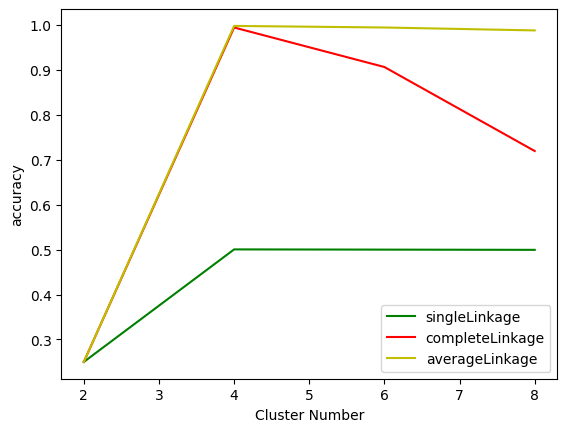

In [45]:
sl = [acc[0] for acc in accuracies]
cl = [acc[1] for acc in accuracies]
al = [acc[2] for acc in accuracies]
plt.xlabel("Cluster Number")
plt.ylabel("accuracy")
plt.plot(ks, sl, 'g')
plt.plot(ks, cl, 'r')
plt.plot(ks, al, 'y')
plt.legend(['singleLinkage','completeLinkage', 'averageLinkage'])
plt.show()

### 结果分析
这里可以看到绘制的准确率变化结果：
* 当**聚类簇数较小时（K=2），三种聚类算法都呈现了较低的准确率，这是因为本身数据集就是4个类别，聚类簇数较少时，聚类算法的性能较差**。这种情况下只会分出两个，自然蒙还不如直接蒙多个的情况，此时一共只会分类2个，不论是什么方法，都没法做到很好的分类。
* 当**聚类簇数达到K=4时：可以看到结果我们之前在前面已经分析过了。这里不再赘述，就是单链性能较差；而完全链和平均链性能都非常优异。**
* 当**聚类簇数达到更高时，看到单链和平均链的模型性能都达到了饱和，不再变化。而完全链的性能却在下降。** 这是因为**完全链聚类算法倾向于产生紧凑的、球形的簇，因此当聚类簇数较多时，会出现簇的大小差异较大的情况，导致完全链聚类算法的性能下降。** 而单链和平均链聚类算法则不会出现这种情况，因此它们的性能不会下降。

## 实验总结
本次实验中，通过依次实现基础、中级、高级及拓展四个阶段的要求，我实现了：
* **数据预分析：**
    
    首先对于给定的数据**进行基础的分析，了解其分布情况。** 我发现了所有样本标签点分布非常平均，而样本的三个特征本身就具有着偏规则的分布特点，这使得我们在最初就推测单链聚类算法性能可能带来的不好效果。**绘制了聚类前的3D图。**
  
* **基础要求**

    基于给定的数据集，我编写了实现**层次聚类算法的类Hierarchical Clustering**，其中对于模型训练的方法中**植入了单链和完全链聚类算法，只对合并的类簇进行更新。** 而对于模型的预测，采用了层次聚类带来**天然树状结构，递归地进行预测。** 最后编写了正确评估性能的利用排列标签的错误率计算函数。**单链结果不佳只有50%，正如我们预料的一样；而完全链性能极佳达到了99%，证明了模型编写的成功。绘制了聚类后的3D图。**

* **中级要求**

    同样地实现了只对合并类簇处理的**平均链聚类算法**，性能也非常优异，并绘制了聚类后的3D图。

* **高级要求**

    基于前面的结果，我综合对比分析了三种算法，给出了一些自己的看法。
    
* **拓展要求**
    我通过变换聚类簇的个数，进一步地挖掘了三种聚类算法之间的差异，给出了更为普遍性的结论。

## 困难与误差分析
实验过程中，我最初在迭代的聚类过程中每次都重复计算一遍距离矩阵，更新的速度较慢。**最后采取了将初步计算结果保存下来，并且每次迭代只处理合并类簇的方式大大地简化了计算性能。**

## 改进方向
* 实验给定的数据集因为具有天然的分布较为规则且偏球型的分布特征，因此后面的单链聚类表现了不好的效果。**不过如果我们最开始使用的就是非球形的簇或者说是形状不规则的簇，那么可能反而会带完全链分层聚类的性能较差，有待进一步探究。**
* 本次实验使用的距离是欧氏距离，实际上可以考虑尝试**曼哈顿距离，切比雪夫距离，甚至马哈拉诺比斯距离等**作为度量距离的方式。
* 本次实验是层次聚类，层次聚类的结果具有**明显的分层性，可以借鉴Lab3中非参数估计一节里面soften的思想，将分层的条件软化，考虑引入权值进行分类。同样也可以考虑自顶向下的分裂聚类。**
* 本次实验使用的是距离作为**衡量样本相似性的指标，实际上可以尝试使用Pearson相关系数或者是余弦相似度等对样本相似度进行估计，甚至最好的估计方式应该是二者的结合。**

## 实验心得和收获

* 本次实验中，我通过亲自分析数据模式，对数据分布不但有了了解，**而且基于我对将要实现的算法的理解，给出了对结果的提前预测，并验证了我的结论。

* 对上课老师所讲到的聚类相关算法有了更深刻的理解。**亲自编写了层次聚类分类模型对我锻炼极大。**

* 通过实现对聚类过程中迭代的距离矩阵计算，我巧妙地只处理部分合并类簇。**大大优化了时间性能。**

* 在进行预测过程中，**我通过利用层次聚类的树状结构编写代码，对我的理解和编程能力都很有帮助。**

* 最后我还通过进一步探索和挖掘，找到了三种聚类算法更深层次的差异。**更加加深了我对算法的理解。**

总的来说我收获颇丰，也是最后一次实现的个人的机器学习作业。**在这里想要对传授我们机器学习这么底层和原理知识的卫老师表达感激，对一直帮我答疑的助教学姐陈曦冉和学长闫乘玮同样表达十分的感谢！这一学期的编程作业我收获极大，后面的大作业我也会和组员们努力完成哒~**